# TASK 1B

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
import seaborn as sns
# Load the dataset
data = pd.read_csv("student_data.csv")

# Data Visualization

C:\Users\LibUser\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


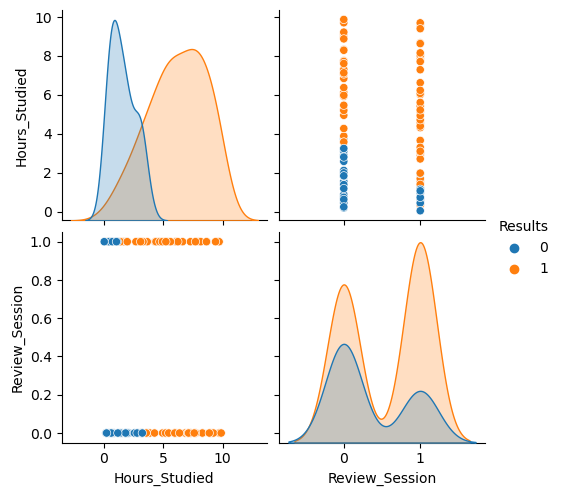

In [2]:
# Pair plot of selected features
feature_columns = ['Hours_Studied', 'Review_Session']  # Replace with your feature columns
sns.pairplot(data=data, hue='Results', vars=feature_columns)
plt.show()

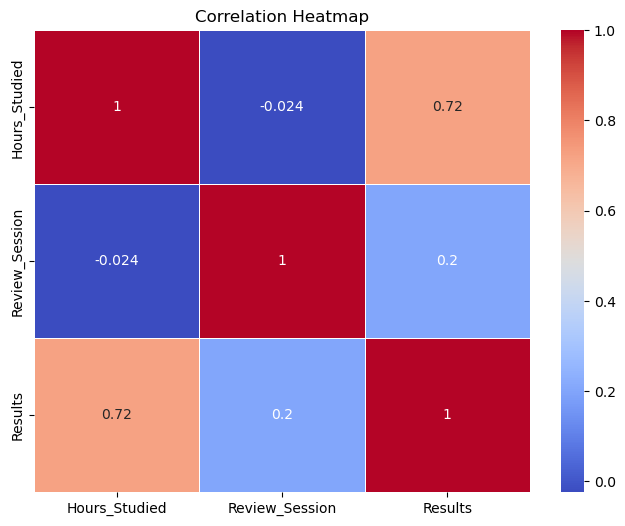

In [3]:
# Correlation heatmap of all feature columns
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


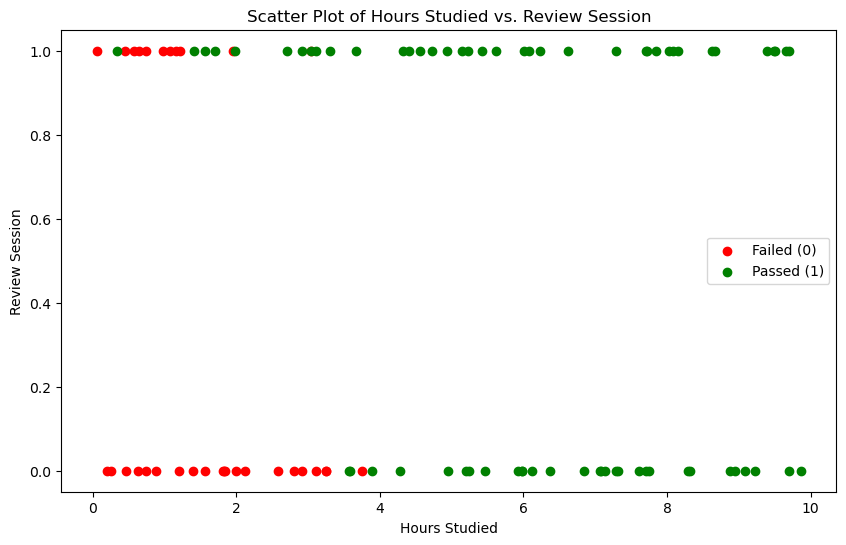

In [4]:
# Scatter plot of 'Hours_Studied' vs 'Review_Session'
plt.figure(figsize=(10, 6))
plt.scatter(data[data['Results'] == 0]['Hours_Studied'], data[data['Results'] == 0]['Review_Session'], color='red', label='Failed (0)')
plt.scatter(data[data['Results'] == 1]['Hours_Studied'], data[data['Results'] == 1]['Review_Session'], color='green', label='Passed (1)')
plt.xlabel('Hours Studied')
plt.ylabel('Review Session')
plt.legend(loc='best')
plt.title('Scatter Plot of Hours Studied vs. Review Session')
plt.show()

# Logistic Regression

Model Coefficients: [1.36499215 1.87733756]
Intercept: -4.611824619845845
Accuracy: 0.93
AUC: 0.9761029411764706


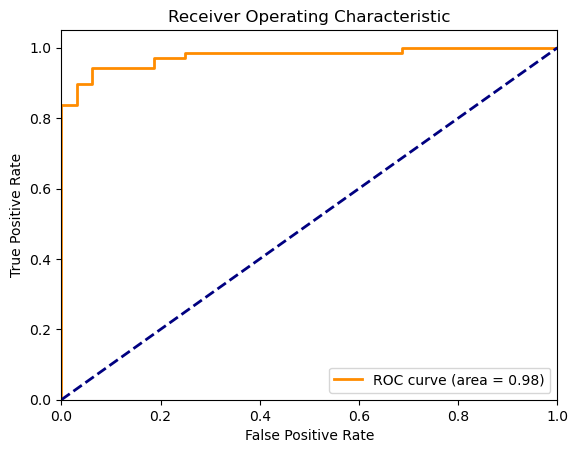

In [5]:

# Prepare the data
X = data.drop(columns=['Results'])  # Replace 'target_column' with the actual target column name
y = data['Results']  # Replace 'target_column' with the actual target column name

# Create and fit a logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Output model coefficients
coefficients = model.coef_[0]
intercept = model.intercept_[0]
print("Model Coefficients:", coefficients)
print("Intercept:", intercept)

# Make predictions on the same dataset
y_pred = model.predict(X)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

# Calculate AUC and plot ROC curve
y_prob = model.predict_proba(X)[:, 1]  # Probability of the positive class
fpr, tpr, _ = roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)

print("AUC:", roc_auc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

C:\Users\LibUser\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\LibUser\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


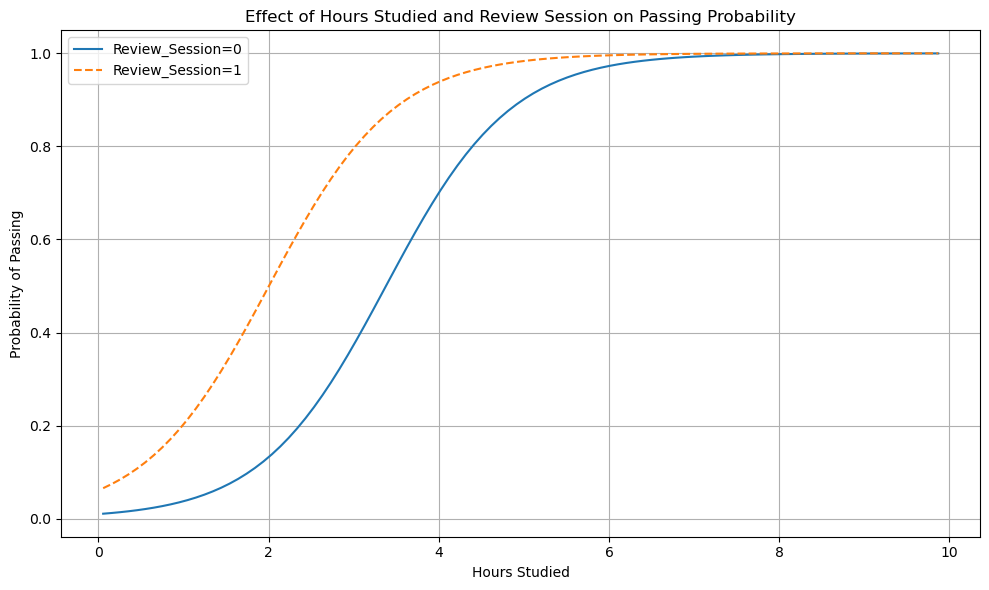

In [6]:
# Create a range of hours studied values for prediction
hours_studied_range = np.linspace(data['Hours_Studied'].min(), data['Hours_Studied'].max(), 100)

# Predict probabilities for each value in the range with both Review_Session values
# Assuming 'Review_Session' values of 0 and 1
probabilities = model.predict_proba(np.column_stack((hours_studied_range, np.zeros(100))))
probabilities_1 = model.predict_proba(np.column_stack((hours_studied_range, np.ones(100))))

# Extract probability values for each class
probability_0 = probabilities[:, 1]  # Probability of passing when Review_Session=0
probability_1 = probabilities_1[:, 1]  # Probability of passing when Review_Session=1

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(hours_studied_range, probability_0, label='Review_Session=0')
plt.plot(hours_studied_range, probability_1, label='Review_Session=1', linestyle='--')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Effect of Hours Studied and Review Session on Passing Probability')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# SVM 

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Support Vector Machine model with a linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# Make predictions
y_pred_linear = svm_linear.predict(X_test)

# Calculate accuracy
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Accuracy (Linear Kernel):", accuracy_linear)

Accuracy (Linear Kernel): 0.85


In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Define the parameter grid for Grid Search
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}

# Create an SVM classifier with an RBF kernel
rbf_svm = SVC(kernel='rbf')

# Use GridSearchCV to find the best combination of C and gamma using 5-fold cross-validation
grid_search = GridSearchCV(rbf_svm, param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_gamma = grid_search.best_params_['gamma']
best_c = grid_search.best_params_['C']

# Fit the RBF SVM with the best hyperparameters
best_rbf_svm = SVC(kernel='rbf', C=best_c, gamma=best_gamma)
best_rbf_svm.fit(X_train, y_train)

# Make predictions with the best RBF SVM model
y_pred_rbf = best_rbf_svm.predict(X_test)

# Calculate accuracy
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("RBF Kernel SVM Accuracy:", accuracy_rbf)
print("Best gamma:", best_gamma)
print("Best C:", best_c)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.